In [1]:
# importing librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset

data = pd.read_csv('train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Dropping unwanted 'Loan_ID' col

data.drop('Loan_ID', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
# Difference between +ve and -ve target value.

data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## 1. Exploratory Data Analysis

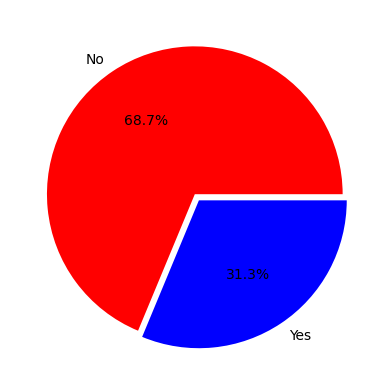

In [5]:
# Pie chart between +ve and -ve target value.

import plotly.graph_objects as go

explode=[.0,.05]
labels = ['No', 'Yes']
mycolors=['Red','Blue']
sizes= data['Loan_Status'].value_counts().values
plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct='%1.1f%%')
plt.show()

In [6]:
# Selecting the cols which have only Numerical Data

data_num = data.select_dtypes(include = np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [7]:
# Dropping numerically set categorical data

data_num.drop(['Loan_Amount_Term', 'Credit_History'], axis = 1, inplace = True)
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


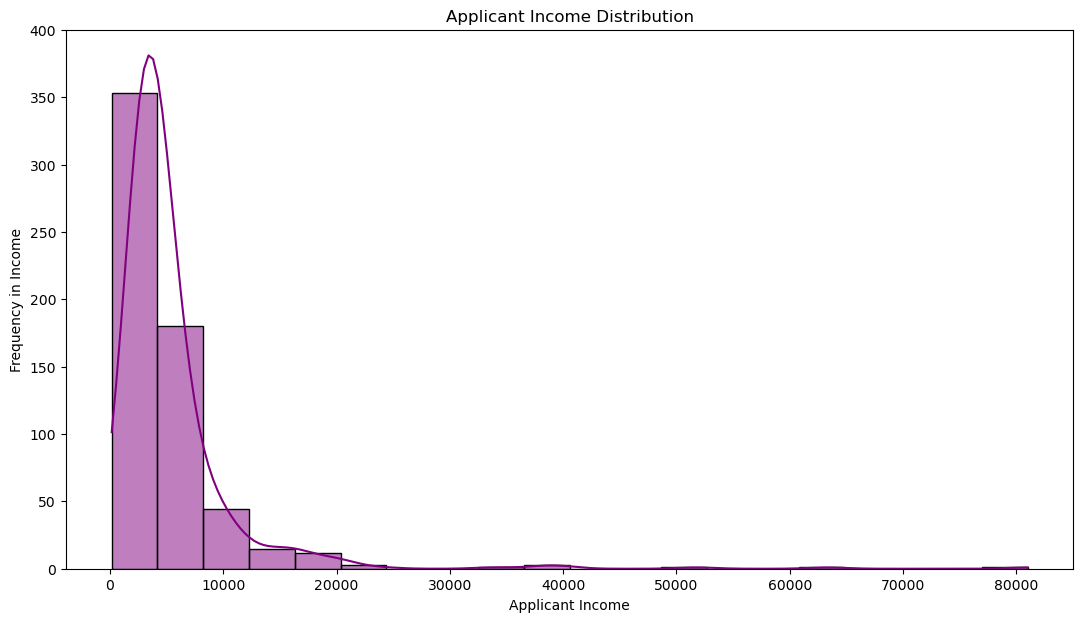

In [8]:
# Distribution for Applicant Income 

plt.figure(figsize=(13,7))
sns.histplot(data.ApplicantIncome,bins = 20, kde = True, color = 'Purple')

plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency in Income')
plt.show()

****

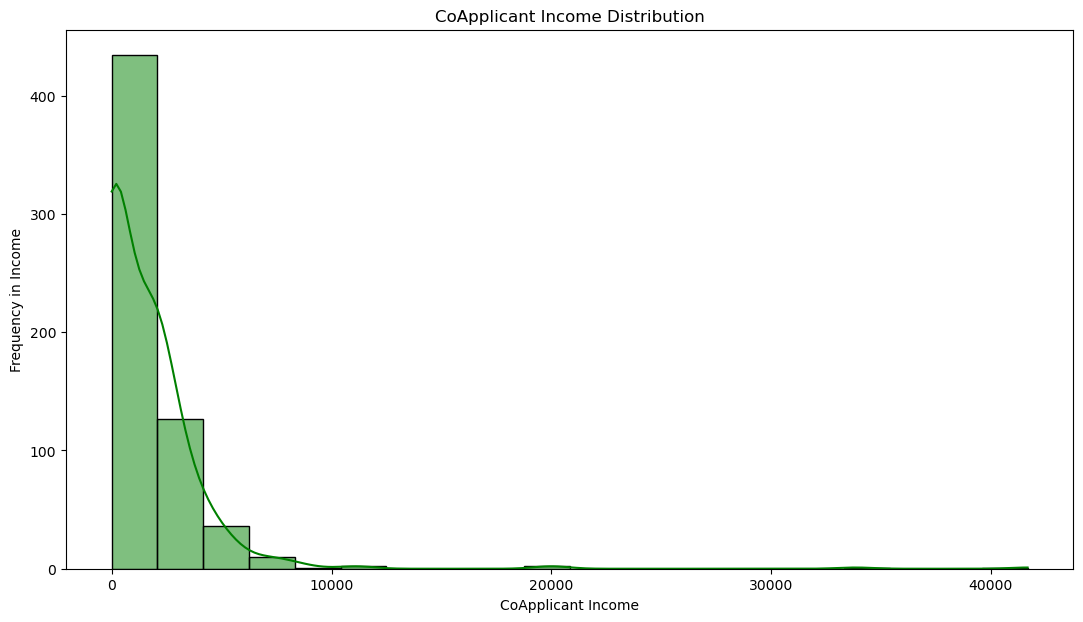

In [9]:
# Distribution for Coapplicant Income 

plt.figure(figsize=(13,7))
sns.histplot(data.CoapplicantIncome,bins = 20, kde = True, color = 'Green')

plt.title('CoApplicant Income Distribution')
plt.xlabel('CoApplicant Income')
plt.ylabel('Frequency in Income')
plt.show()

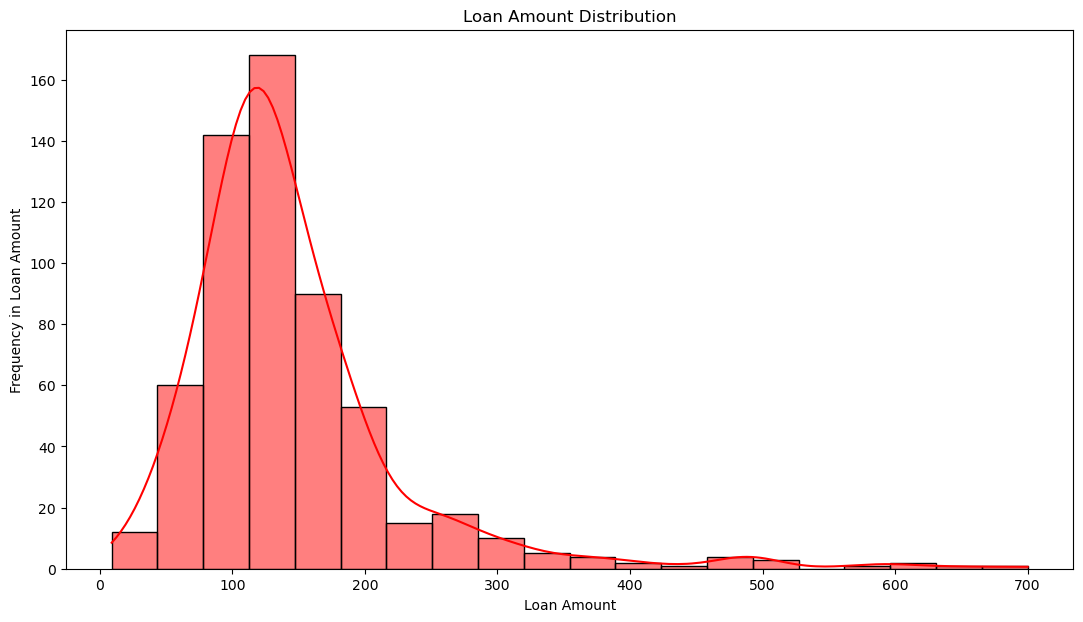

In [10]:
# Distribution for Loan Amount 

plt.figure(figsize=(13,7))
sns.histplot(data.LoanAmount,bins = 20, kde = True, color = 'Red')

plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency in Loan Amount')
plt.show()

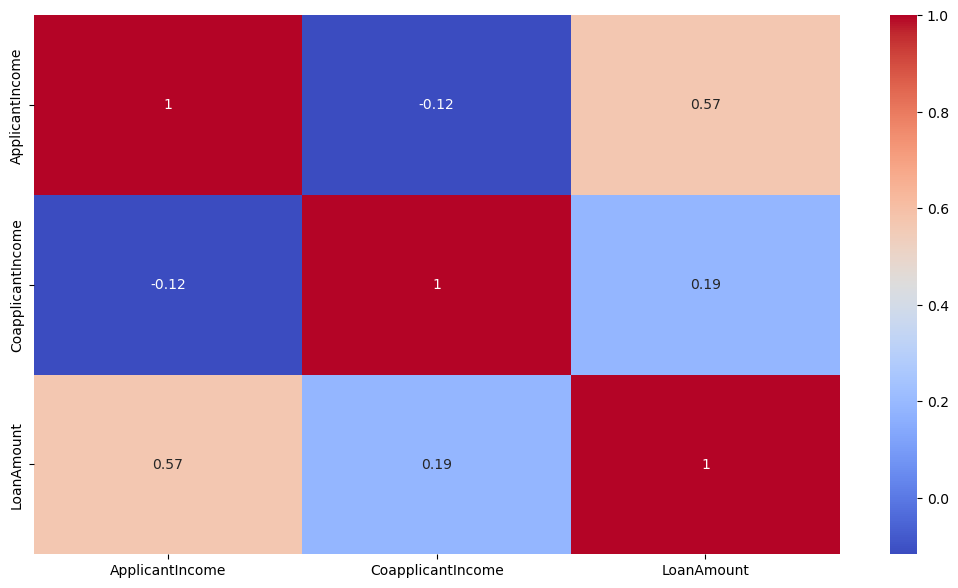

In [11]:
# Relation between these Numerical cols

plt.figure(figsize = (13,7))
sns.heatmap(data_num.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [12]:
# Selecting the cols which have only Categorical Data

data_cat = data.select_dtypes(include = object)
data_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


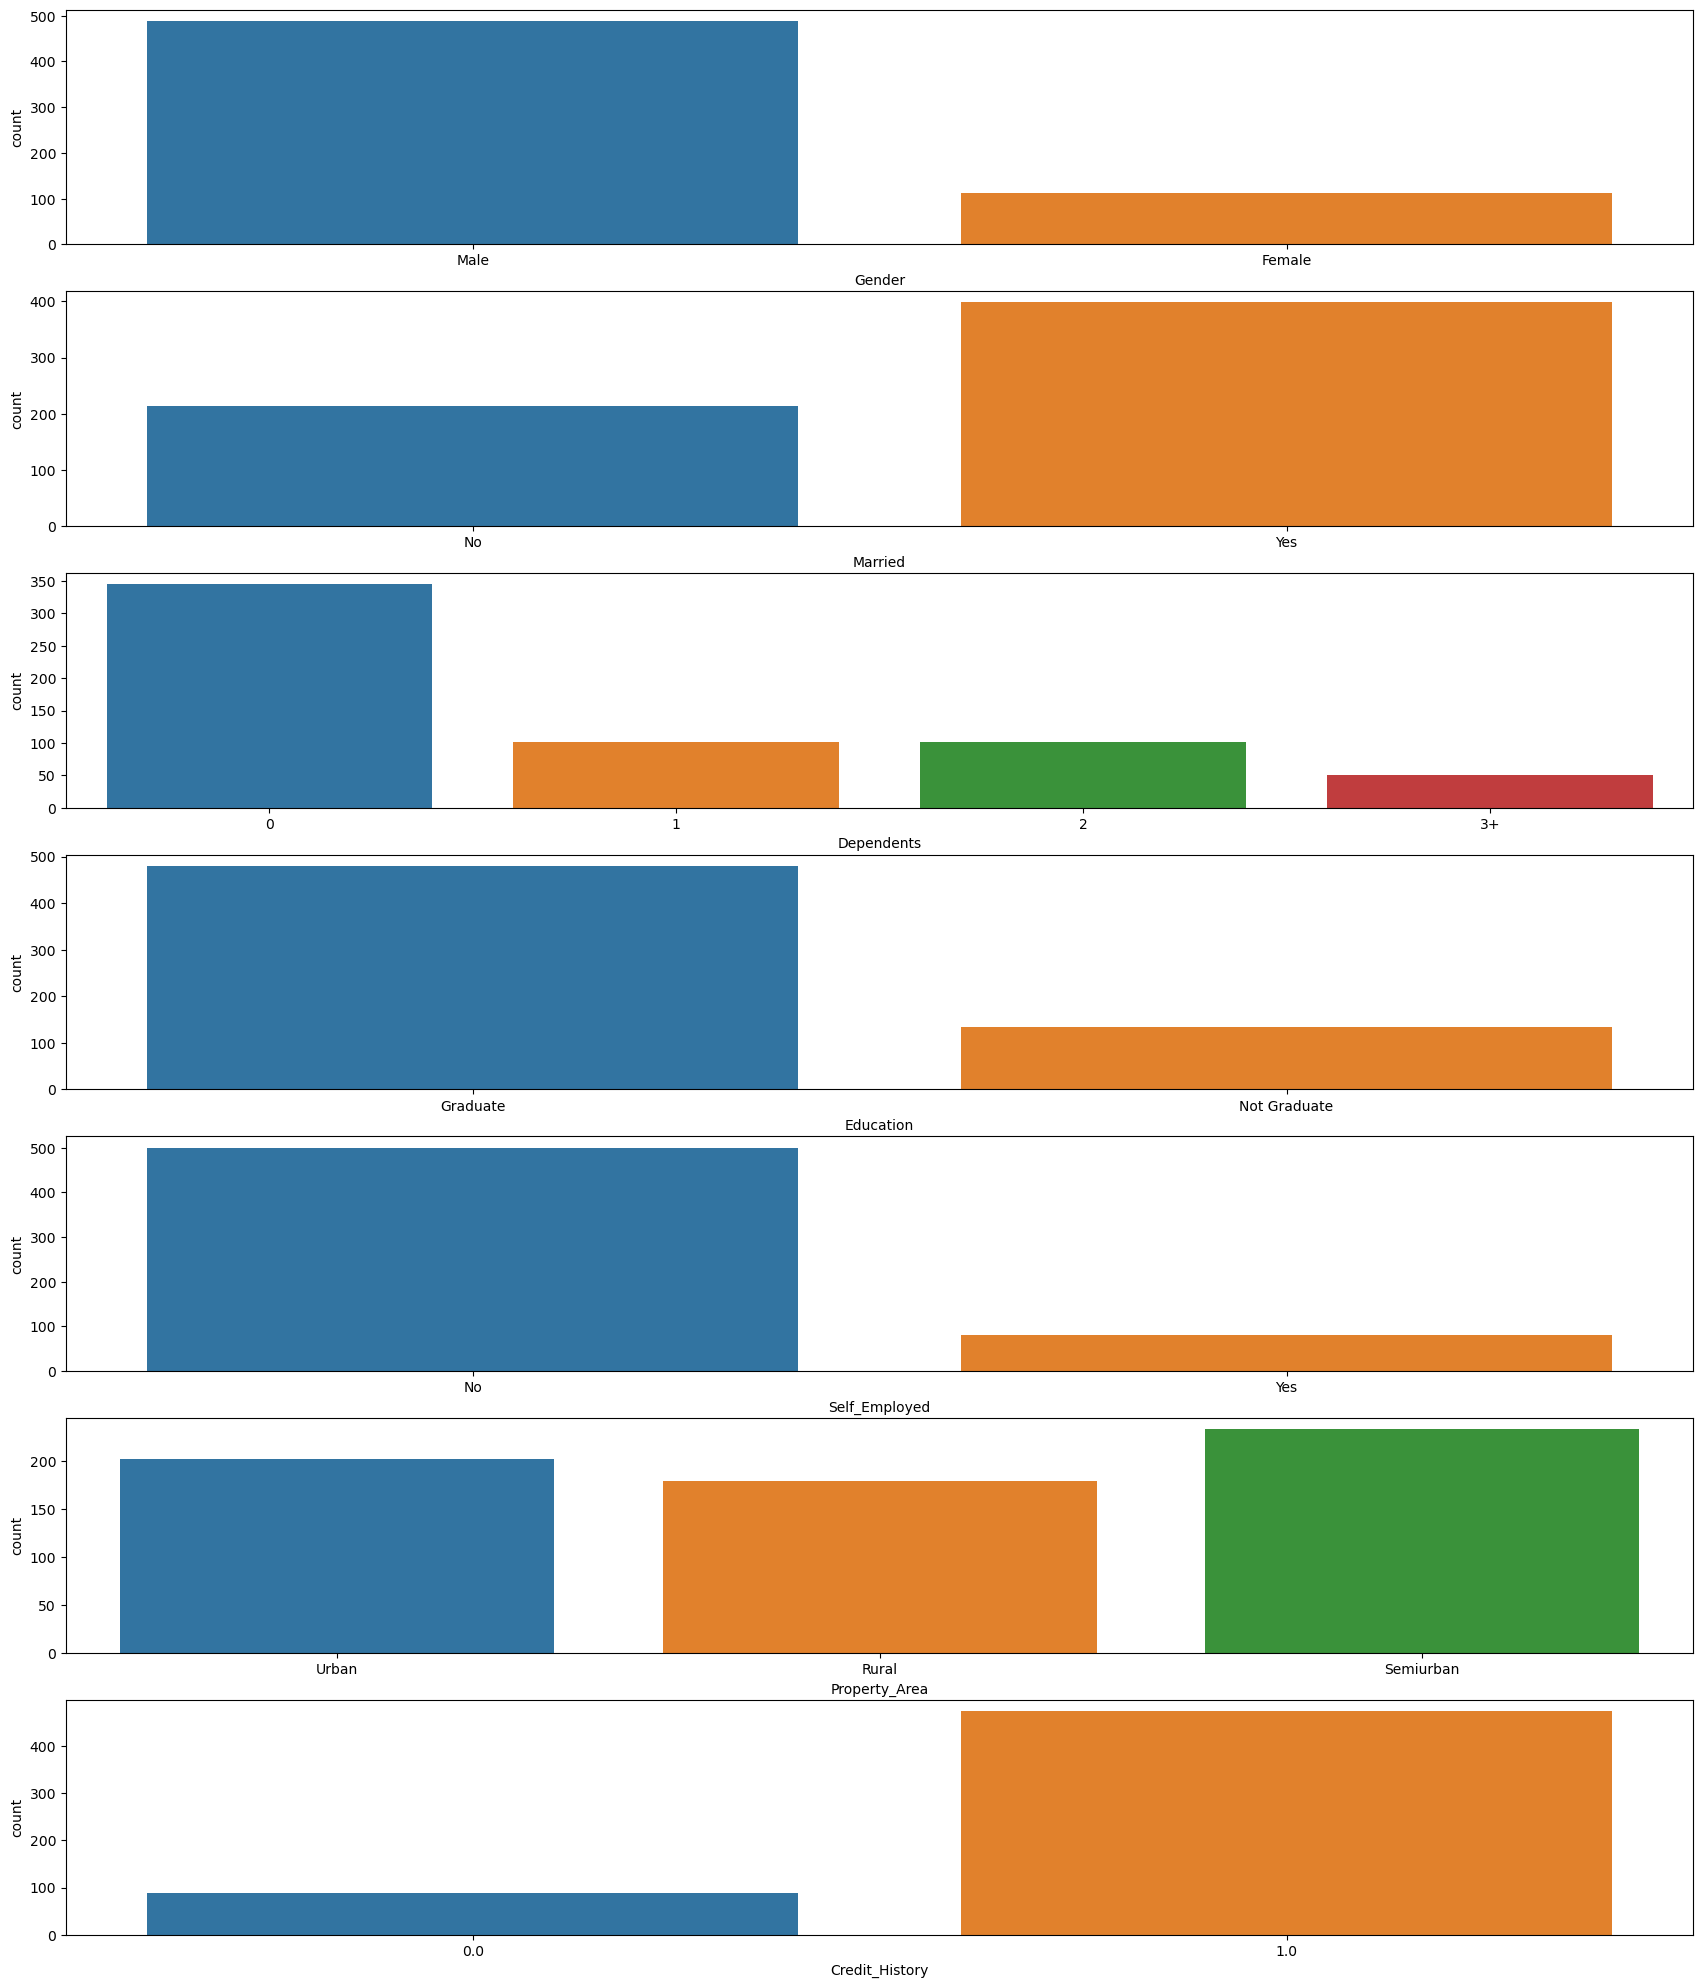

In [13]:
fig, ax = plt.subplots(7,1, figsize = (21,25))

cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

for i, val in enumerate(cols):
    sns.countplot(x = val, data = data, ax = ax[i])

### Bi-Variate Analysis

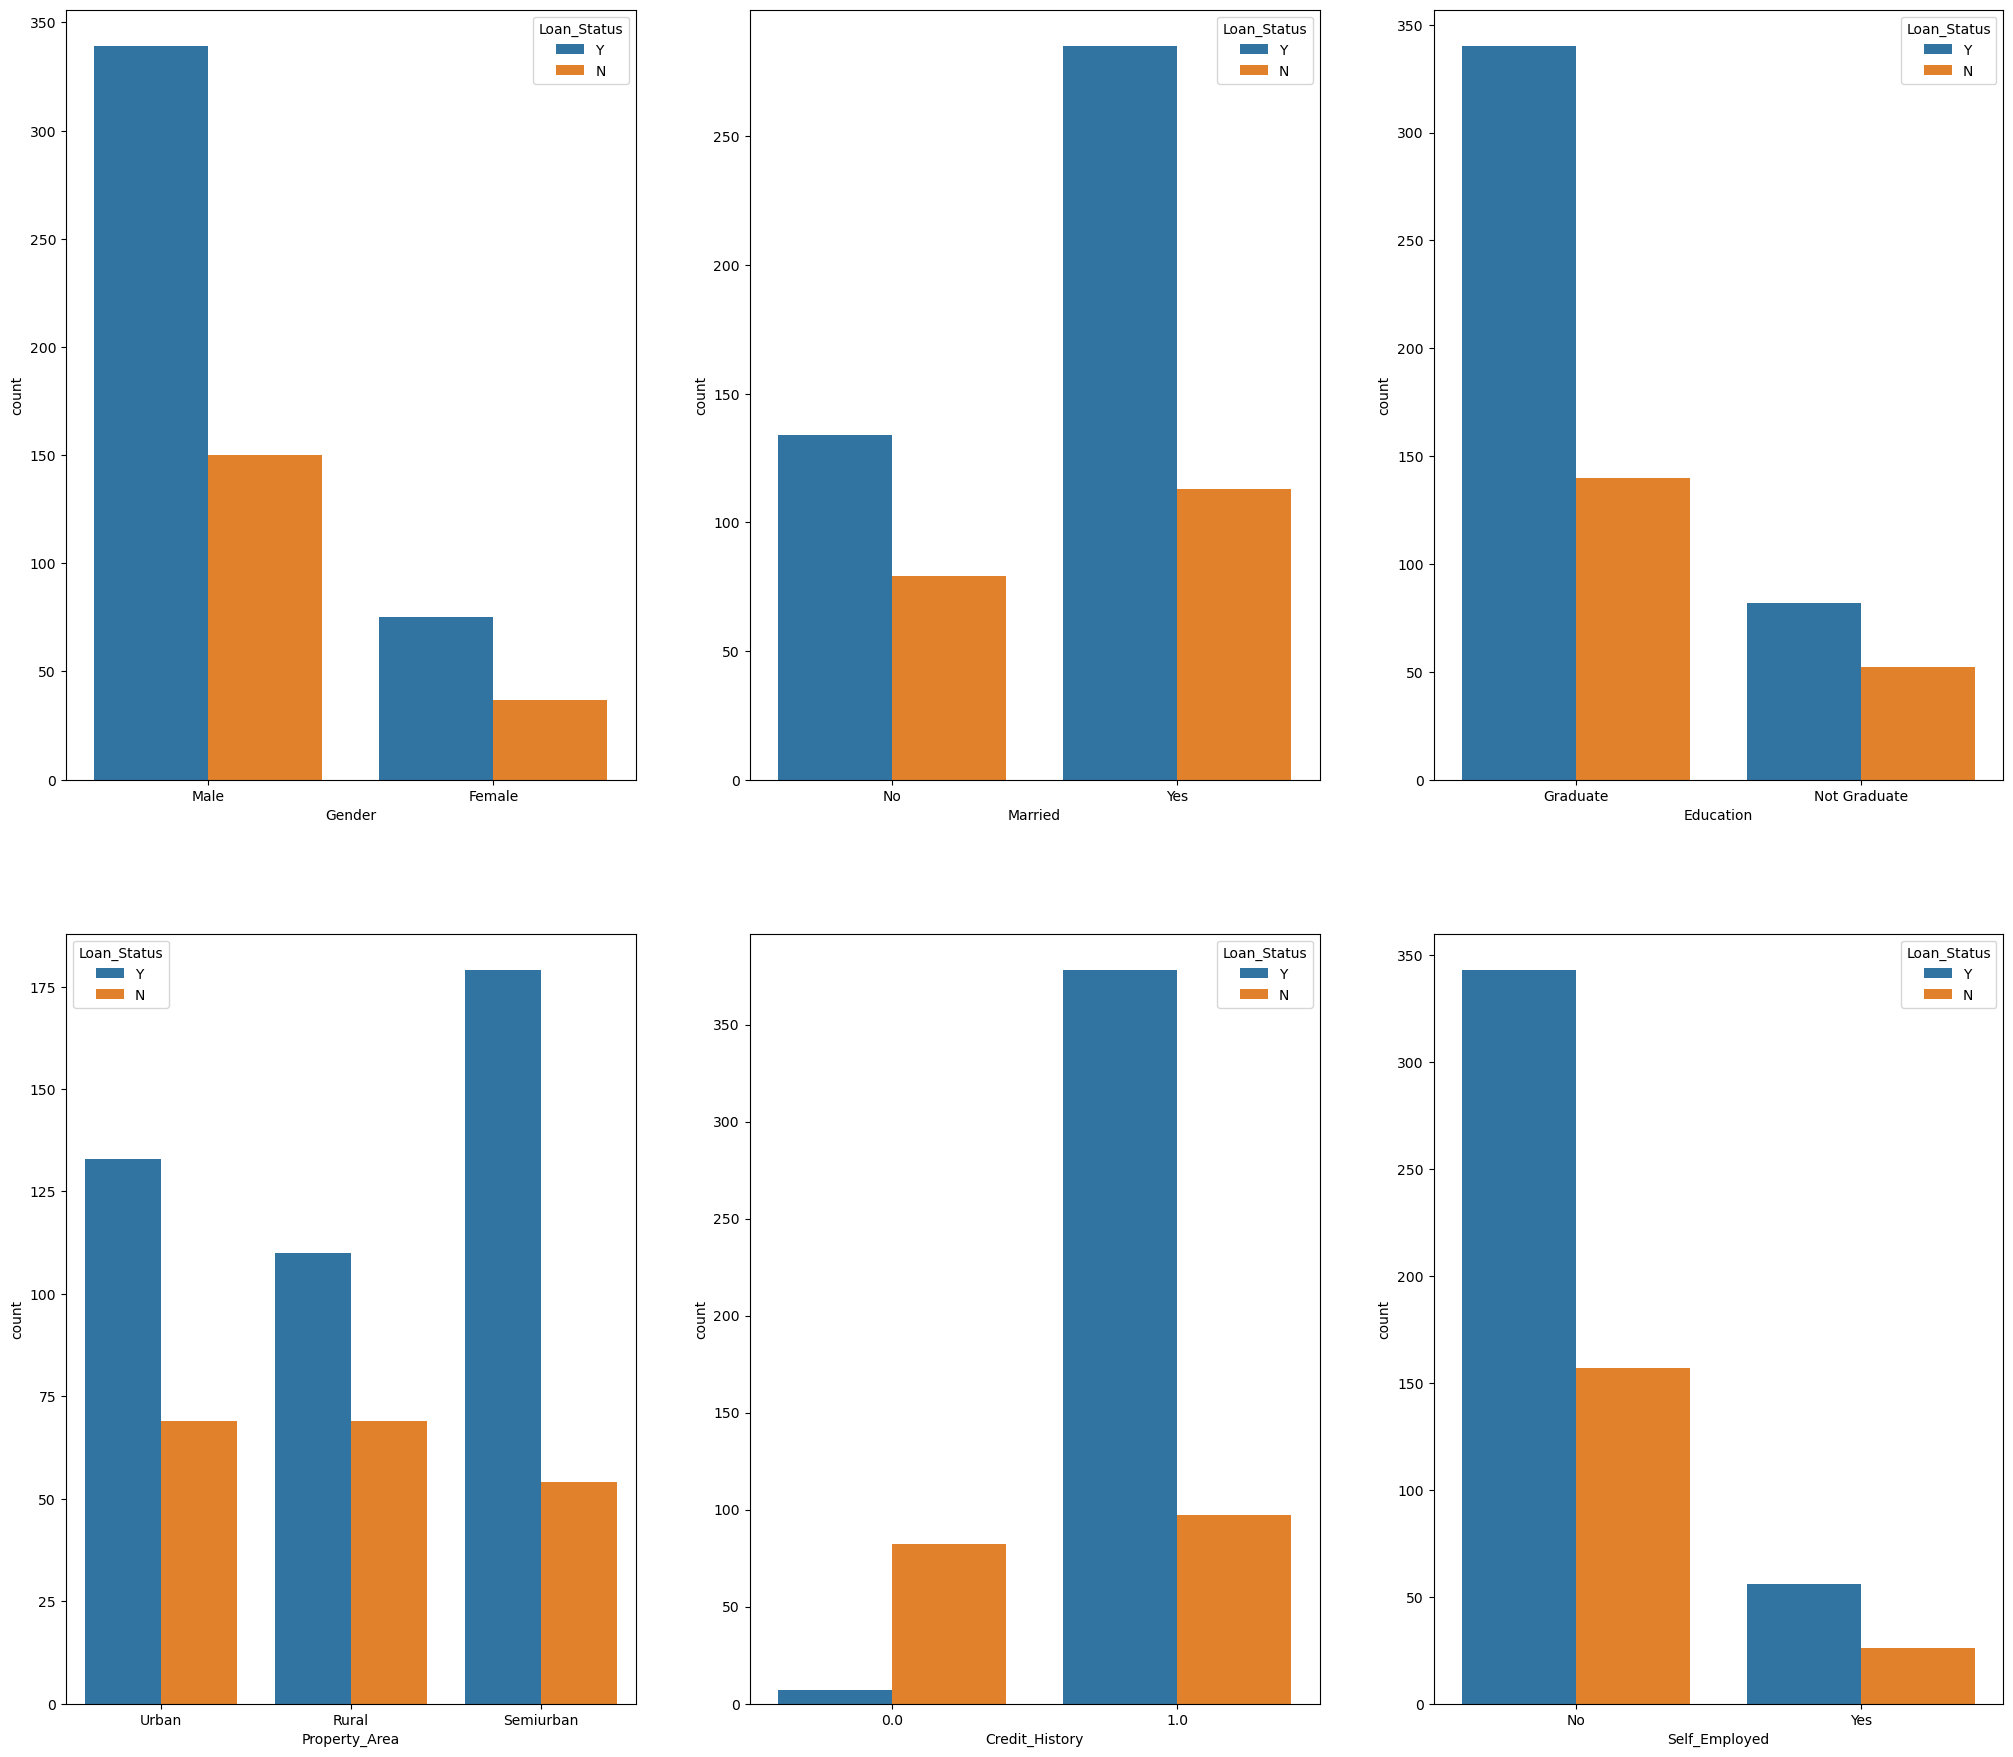

In [14]:
# Bi-Variate Anaylsing

fig,ax = plt.subplots(2,3,figsize=(25,22))

sns.countplot(x = 'Gender',hue = 'Loan_Status', data = data,ax=ax[0][0])
sns.countplot(x = 'Married',hue = 'Loan_Status', data = data, ax = ax[0][1])
sns.countplot(x = 'Education',hue = 'Loan_Status', data = data, ax = ax[0][2])
sns.countplot(x = 'Property_Area',hue = 'Loan_Status', data = data, ax = ax[1][0])
sns.countplot(x = 'Credit_History',hue = 'Loan_Status', data = data, ax = ax[1][1])
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status', data = data, ax = ax[1][2])

plt.show()

- In gender graph the ratio remains almost same around 340 male have approved loan and 140 male are rejected for loan and in case of females 70 approved and 35 rejected.
- In married graph the ratio remains almost same around 130 unmarried people loan approved and 70 rejected for loan or in case of married 290 approved and 120 rejected.
- In eduction graph the ratio remains almost same around 340 graduate people loan are approved and 135 rejected for loan and in case of not graduate people 75 approved and 50 rejected.
- In property area graph the ratio remains almost same around 135 urban area people have approved loan and 60 are rejected for loan and in case of rural 110 approved and 70 rejected and in case of semiurban 180 approved and 55 rejected.
- In credit history graph around 10 people having 0.0 cred history have approved loan and 75 are rejected for loan and in case of 1.0 credit history 400 approved and 80 rejected.
- In self employed graph around 340 non self employed have approved loan and 160 are rejected for loan and in case of self employed 55 approved and 30 rejected.

## 2. Feature Engineering

In [15]:
# Checking the Missing Values.

data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Handling / Filling Missing(Null) Values

data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [17]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Handling Categorical Data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in cols:
    data[i] = le.fit_transform(data[i])
    
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


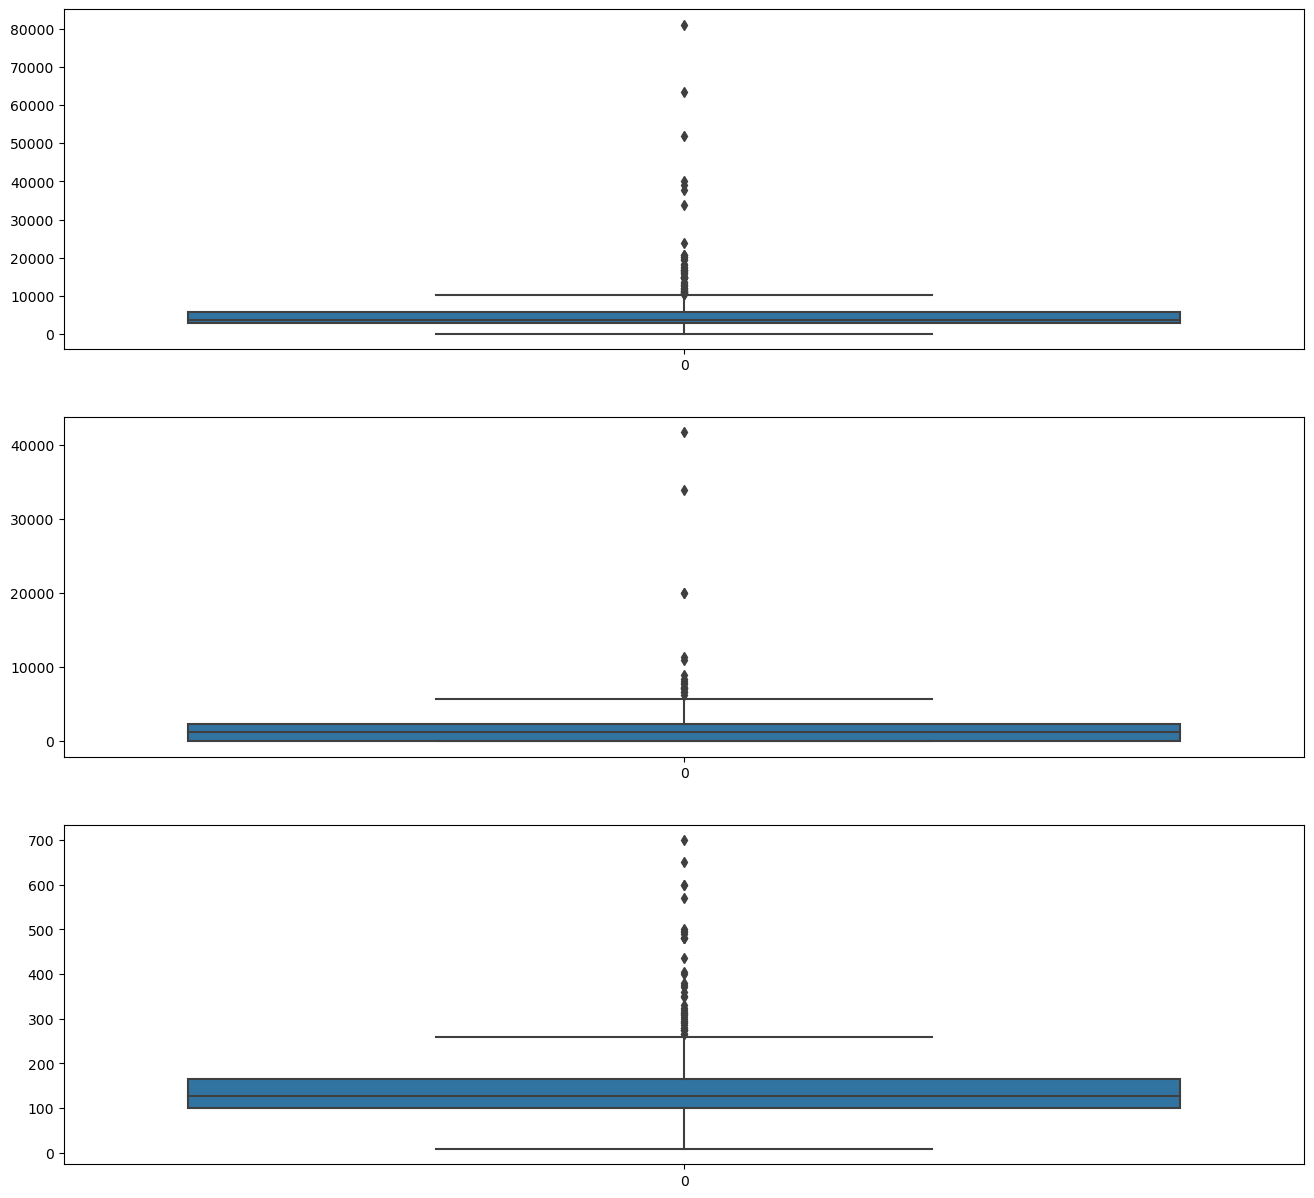

In [19]:
# Checking Outliers

fig, axs = plt.subplots(3,1, figsize = (16,15))

plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2])

plt.show()

In [20]:
# Handle Outliers using IQR

Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

In [21]:
# Outliers Detection for Applicant Income

upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [22]:
# Outliers Detection for Coapplicant Income

Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['CoapplicantIncome'] >= Q1-3*IQR) & (data['CoapplicantIncome'] <= Q3+3*IQR)]
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
# Outliers Detection for Loan Amount

Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['LoanAmount'] >= Q1-3*IQR) & (data['LoanAmount'] <= Q3 + 3 * IQR)]
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


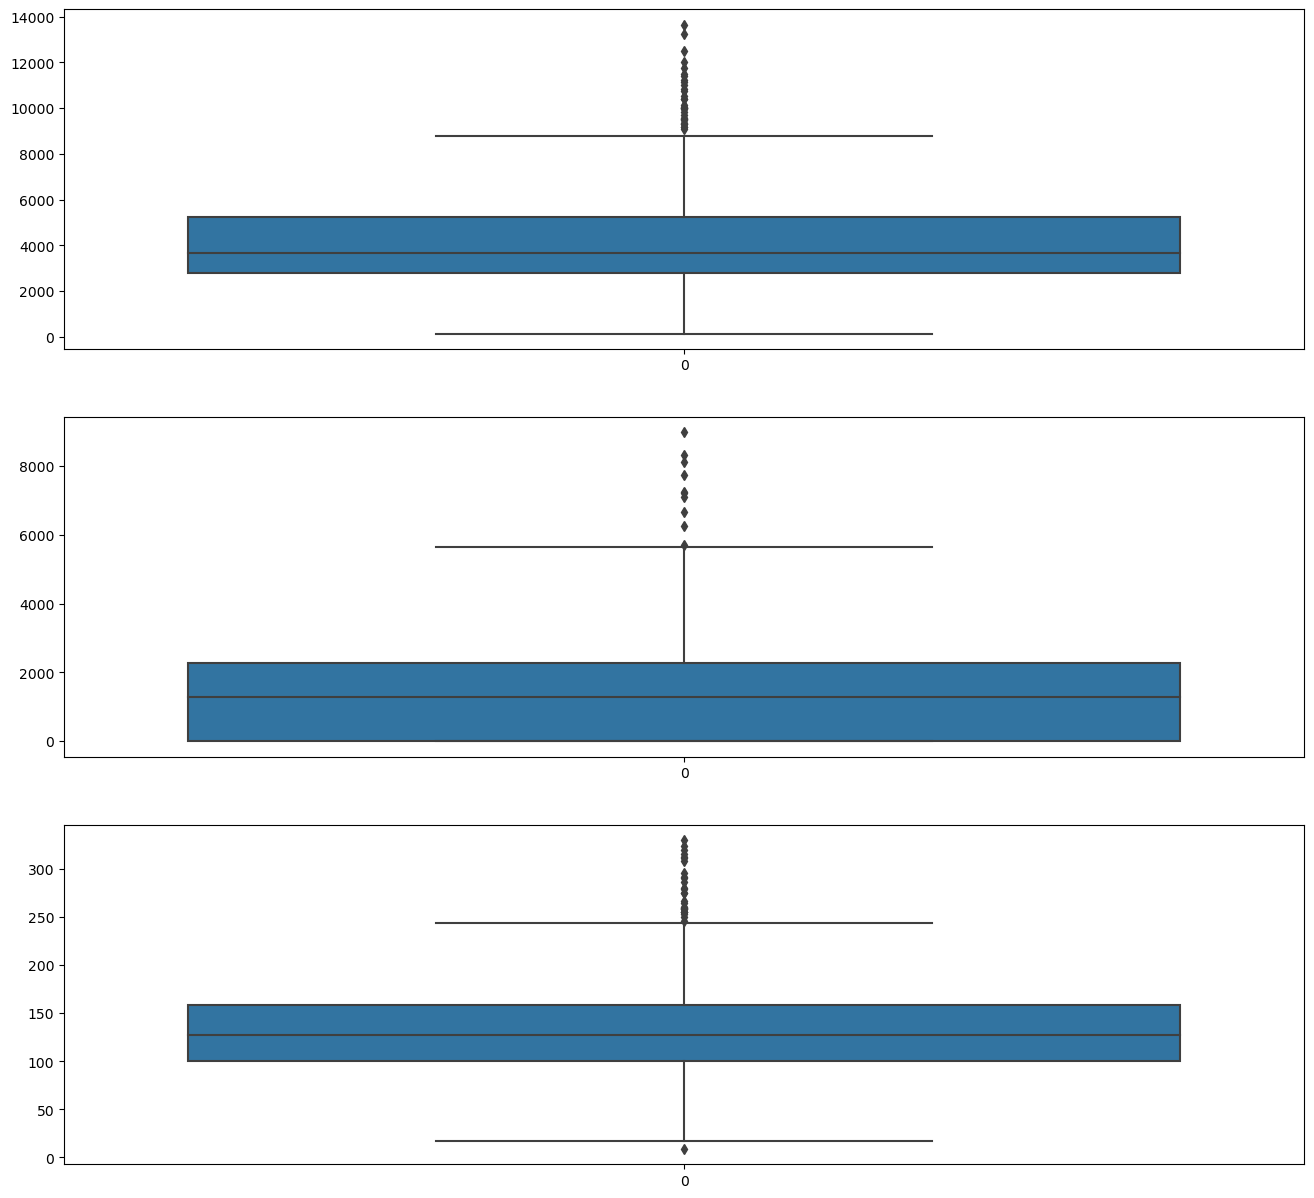

In [24]:

fig, axs = plt.subplots(3,1, figsize = (16,15))

plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2])

plt.show()

## 3. Feature Selection

In [25]:
from sklearn.feature_selection import chi2

In [26]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
x1 = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area']]
y1 = data['Loan_Status']

score = chi2(x1,y1)
score

(array([ 0.11954126,  1.72779232,  0.1034337 ,  4.35000265,  0.3473718 ,
        25.18454835,  0.29571963]),
 array([7.29532559e-01, 1.88693084e-01, 7.47747338e-01, 3.70088886e-02,
        5.55604671e-01, 5.20979354e-07, 5.86578355e-01]))

### Chi-Square (Test for Independance)   [For Categorical Data Only.]

- Null Hypothesis: Variables are independent on each other 
- Alternate Hypothesis: Variables are dependent on each other

*If p_value is <= 0.05 then we can reject the null hypothesis else we can accept the null hypothesis.*

In [28]:
p_value = pd.Series(score[1], index = x1.columns)
p_value

Gender            7.295326e-01
Married           1.886931e-01
Dependents        7.477473e-01
Education         3.700889e-02
Self_Employed     5.556047e-01
Credit_History    5.209794e-07
Property_Area     5.865784e-01
dtype: float64

In [29]:
irr_cols = []

for x in p_value.index:
    if p_value[x] <= 0.05:
        print(x,':- Reject the null hypothesis.')
    else:
        print(x,':- Accept the null hypothesis.')
        irr_cols.append(x)

irr_cols

Gender :- Accept the null hypothesis.
Married :- Accept the null hypothesis.
Dependents :- Accept the null hypothesis.
Education :- Reject the null hypothesis.
Self_Employed :- Accept the null hypothesis.
Credit_History :- Reject the null hypothesis.
Property_Area :- Accept the null hypothesis.


['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']

In [30]:
data.drop('Gender', axis = 1, inplace = True)
data.drop('Married', axis = 1, inplace = True)
data.drop('Dependents', axis = 1, inplace = True)
data.drop('Self_Employed', axis = 1, inplace = True)
data.drop('Property_Area', axis = 1, inplace = True)

data.drop('Loan_Amount_Term', axis = 1, inplace = True)

In [31]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1.0,1
1,0,4583,1508.0,128.0,1.0,0
2,0,3000,0.0,66.0,1.0,1
3,1,2583,2358.0,120.0,1.0,1
4,0,6000,0.0,141.0,1.0,1


### Data Split

In [32]:
x = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

In [33]:
# Splitting data into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 32)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((456, 5), (115, 5), (456,), (115,))

## 4. Model Building

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [36]:
# Fit the Data in the DT model.

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
# Makes Prediction with the model.

pred = dt.predict(x_test)

## 5. Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, classification_report, confusion_matrix

print('Accuracy score', accuracy_score(y_test,pred))

Accuracy score 0.7391304347826086


In [39]:
print('F1_score', f1_score(y_test,pred))

F1_score 0.8125000000000001


In [40]:
print('AUC score', roc_auc_score(y_test,pred))

AUC score 0.689170182841069


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57        36
           1       0.80      0.82      0.81        79

    accuracy                           0.74       115
   macro avg       0.70      0.69      0.69       115
weighted avg       0.74      0.74      0.74       115



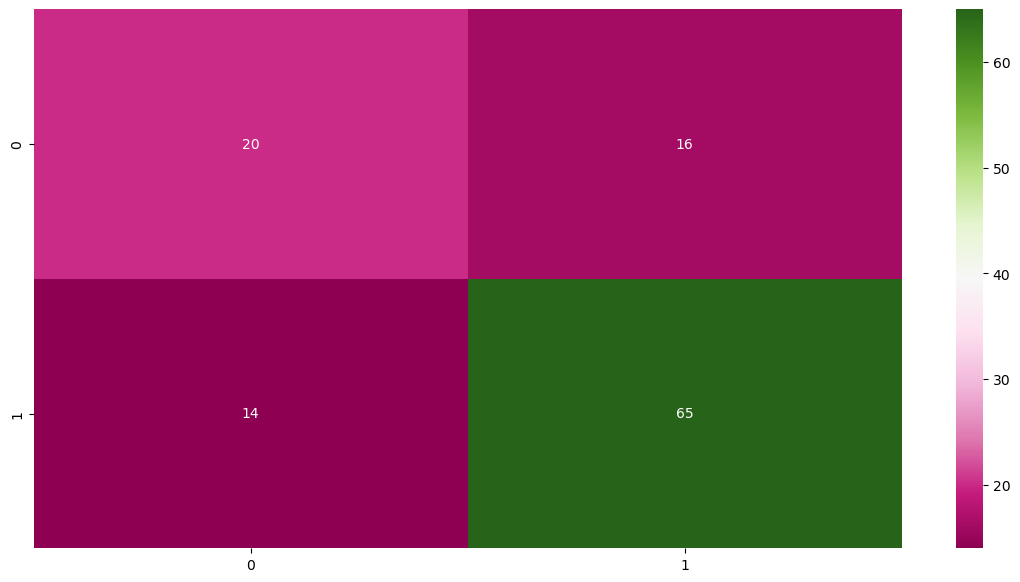

In [42]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

## Hyper Parameter Tunning

### Manual Tunning

In [43]:
dt_tune = DecisionTreeClassifier(criterion='entropy',max_depth = 3,min_samples_split = 35)

In [44]:
dt_tune.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [45]:
# Making prediction 

pred_t = dt_tune.predict(x_test)

In [46]:
print(classification_report(y_test,pred_t))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        36
           1       0.79      0.97      0.87        79

    accuracy                           0.80       115
   macro avg       0.83      0.70      0.72       115
weighted avg       0.82      0.80      0.77       115



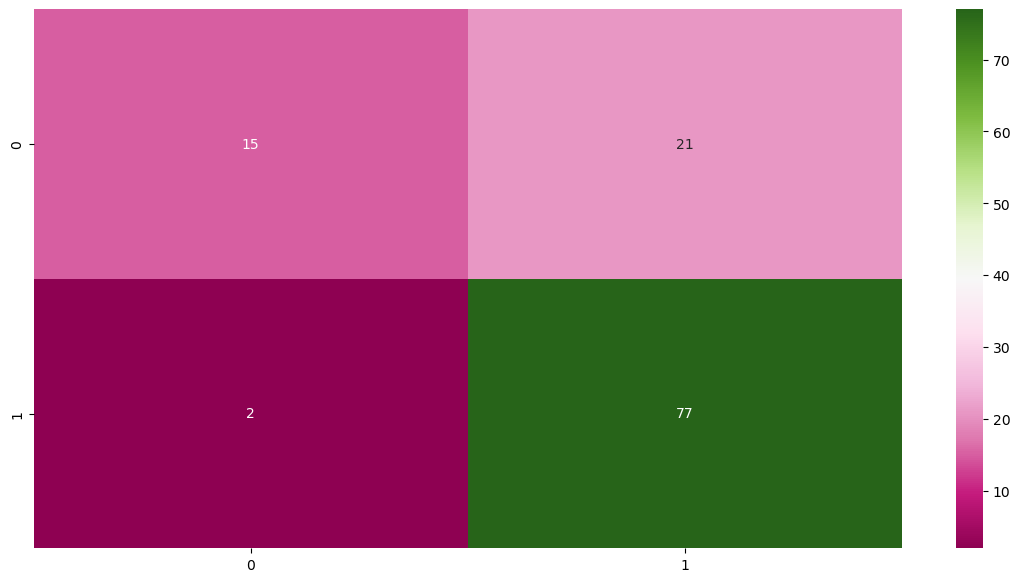

In [47]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred_t)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

#### Grid Search CV

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [49]:
#Maximum number of levels in tree
max_depth =[int(x) for x in np.linspace(3,50,20)]

# Minimum number of samples required to split a node
min_samples_split=[5,8,10,12,15,20,30,35,40]

param_grid= {'max_depth': max_depth,'min_samples_split': min_samples_split,'criterion':['entropy','gini impurity']}

In [50]:
grid_model = GridSearchCV(dt,param_grid, cv = 3)

In [51]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini\xa0impurity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 10, 12, 15, 20, 30, 35,
                                               40]})

In [52]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}

In [53]:
dt_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 5)

In [54]:
dt_grid.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)

In [55]:
# Makes Prediction

pred_g = dt_grid.predict(x_test)

In [56]:
print(classification_report(y_test,pred_g))

              precision    recall  f1-score   support

           0       0.65      0.47      0.55        36
           1       0.79      0.89      0.83        79

    accuracy                           0.76       115
   macro avg       0.72      0.68      0.69       115
weighted avg       0.74      0.76      0.74       115



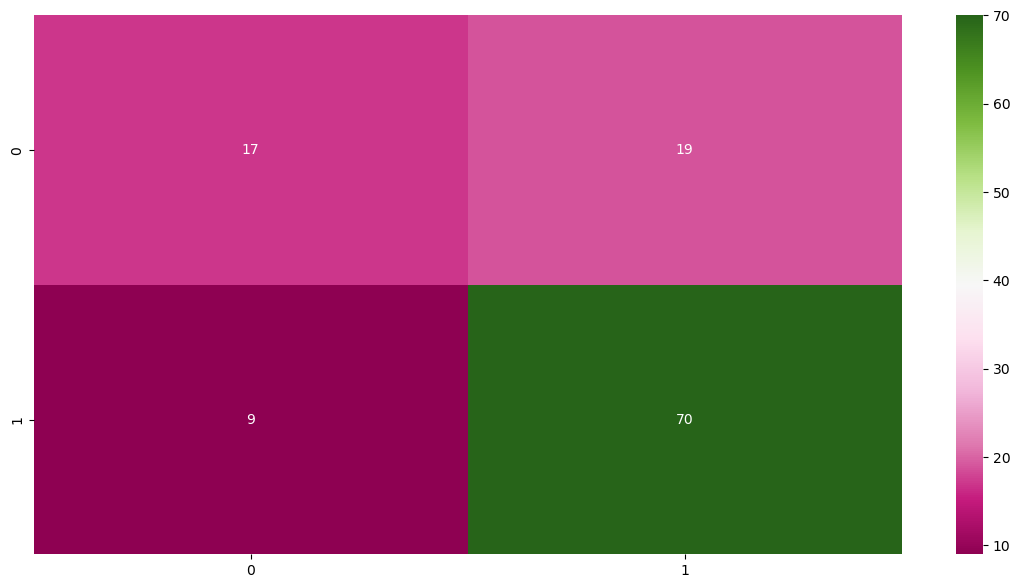

In [57]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred_g)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

In [58]:
grid_model.best_score_

0.8070175438596491

#### Randomized Search CV

In [70]:
random_model = RandomizedSearchCV(dt,param_grid, cv = 3)

In [71]:
random_model.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy',
                                                      'gini\xa0impurity'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50],
                                        'min_samples_split': [5, 8, 10, 12, 15,
                                                              20, 30, 35, 40]})

In [72]:
random_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)

In [62]:
random_model.best_params_

{'min_samples_split': 40, 'max_depth': 5, 'criterion': 'entropy'}

In [73]:
dt_random = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)

In [74]:
dt_random.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)

In [75]:
# Makes Prediction

pred_r = dt_random.predict(x_test)

In [76]:
print(classification_report(y_test,pred_r))

              precision    recall  f1-score   support

           0       0.65      0.47      0.55        36
           1       0.79      0.89      0.83        79

    accuracy                           0.76       115
   macro avg       0.72      0.68      0.69       115
weighted avg       0.74      0.76      0.74       115



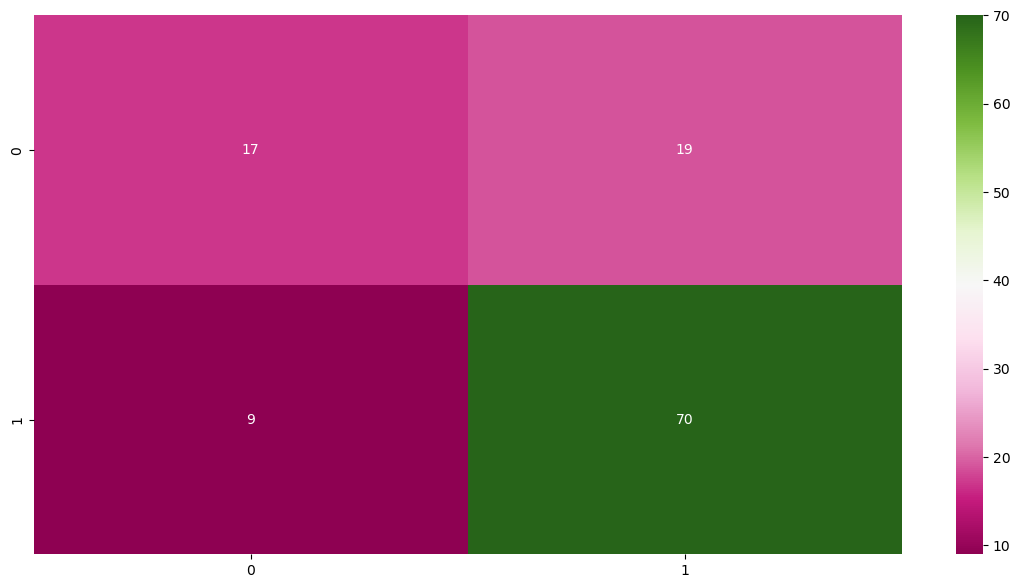

In [77]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred_r)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

In [78]:
random_model.best_score_

0.8048245614035089

In [79]:
# Saving the model

import pickle 
pickle_out = open("Automating_Loan_Prediction_System.pkl", mode = "wb") 
pickle.dump(dt, pickle_out) 
pickle_out.close()